In [141]:
import pandas as pd

PATH   = ('/Users/soyoung/ml_project/test_proj/train.csv')
data = pd.read_csv(PATH)

In [142]:
data = data.drop_duplicates()
data.isna().sum()


id                          0
hour                        0
hour_bef_temperature        2
hour_bef_precipitation      2
hour_bef_windspeed          9
hour_bef_humidity           2
hour_bef_visibility         2
hour_bef_ozone             76
hour_bef_pm10              90
hour_bef_pm2.5            117
count                       0
dtype: int64

In [143]:
data.dropna(inplace=True)

In [144]:
data.head()

,id,hour,hour_bef_temperature,hour_bef_precipitation,hour_bef_windspeed,hour_bef_humidity,hour_bef_visibility,hour_bef_ozone,hour_bef_pm10,hour_bef_pm2.5,count
0,3,20,16.3,1.0,1.5,89.0,576.0,0.027,76.0,33.0,49.0
1,6,13,20.1,0.0,1.4,48.0,916.0,0.042,73.0,40.0,159.0
2,7,6,13.9,0.0,0.7,79.0,1382.0,0.033,32.0,19.0,26.0
3,8,23,8.1,0.0,2.7,54.0,946.0,0.040,75.0,64.0,57.0
4,9,18,29.5,0.0,4.8,7.0,2000.0,0.057,27.0,11.0,431.0


In [145]:
from sklearn.preprocessing import MinMaxScaler

mscaler = MinMaxScaler()
data.columns

Index(['id', 'hour', 'hour_bef_temperature', 'hour_bef_precipitation',
       'hour_bef_windspeed', 'hour_bef_humidity', 'hour_bef_visibility',
       'hour_bef_ozone', 'hour_bef_pm10', 'hour_bef_pm2.5', 'count'],
      dtype='object')

In [146]:
# 변환데이터
y= data.pop('count')
X = data
y

0        49.0
1       159.0
2        26.0
3        57.0
4       431.0
        ...  
1454     21.0
1455     20.0
1456     22.0
1457    216.0
1458    170.0
Name: count, Length: 1328, dtype: float64

In [147]:
X = mscaler.fit_transform(X)

In [148]:
from sklearn.model_selection import train_test_split

In [149]:
X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.3)
y_test.size

399

In [150]:
from sklearn.linear_model import LinearRegression

In [151]:
model = LinearRegression()
model.fit(X_train,y_train)
pred = model.predict(X_test)
pred.size

399

In [152]:
from sklearn.metrics import r2_score

In [153]:
r2_score(y_test,pred)

0.5912531365387812

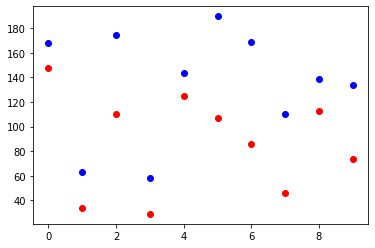

In [154]:
import matplotlib.pyplot as plt
plt.plot(y_test.to_numpy()[:10],'ro')
plt.plot(pred[:10],'bo')